In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/MALL CUSTOMER/Mall_Customers.csv')

In [ ]:
x=dataset.iloc[:,[1,2,3,4]].values


In [ ]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Gender']= label_encoder.fit_transform(dataset['Gender'])
dataset['Gender'].unique()

array([1, 0])

In [ ]:
x

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40],
       ['Female', 22, 17, 76],
       ['Female', 35, 18, 6],
       ['Female', 23, 18, 94],
       ['Male', 64, 19, 3],
       ['Female', 30, 19, 72],
       ['Male', 67, 19, 14],
       ['Female', 35, 19, 99],
       ['Female', 58, 20, 15],
       ['Female', 24, 20, 77],
       ['Male', 37, 20, 13],
       ['Male', 22, 20, 79],
       ['Female', 35, 21, 35],
       ['Male', 20, 21, 66],
       ['Male', 52, 23, 29],
       ['Female', 35, 23, 98],
       ['Male', 35, 24, 35],
       ['Male', 25, 24, 73],
       ['Female', 46, 25, 5],
       ['Male', 31, 25, 73],
       ['Female', 54, 28, 14],
       ['Male', 29, 28, 82],
       ['Female', 45, 28, 32],
       ['Male', 35, 28, 61],
       ['Female', 40, 29, 31],
       ['Female', 23, 29, 87],
       ['Male', 60, 30, 4],
       ['Female', 21, 30, 73],
       ['Male', 53, 33, 4],
       ['Male

In [ ]:
x=dataset[['CustomerID', 'Gender', 'Age','Spending Score (1-100)']]

In [ ]:
x

,CustomerID,Gender,Age,Spending Score (1-100)
0,1,1,19,39
1,2,1,21,81
2,3,0,20,6
3,4,0,23,77
4,5,0,31,40
...,...,...,...,...
195,196,0,35,79
196,197,0,45,28
197,198,1,32,74
198,199,1,32,18


In [ ]:
y=dataset['Annual Income (k$)']
y

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17
...,...
195,120
196,126
197,126
198,137


In [ ]:
#finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss=[]

In [ ]:
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

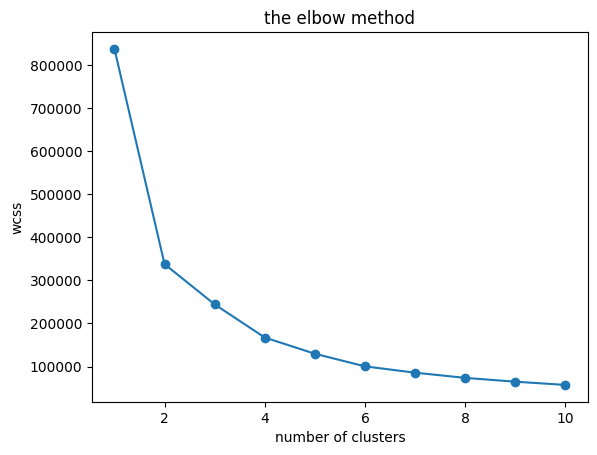

In [ ]:
#plotting the results onto a line graph, allowing us to observe the elboe
plt.plot(range(1,11), wcss,marker='o')
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')#within cluster sum of squares
plt.show()

In [ ]:
#Applying kmeans to the dataset/ creating the kmeans classifier
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

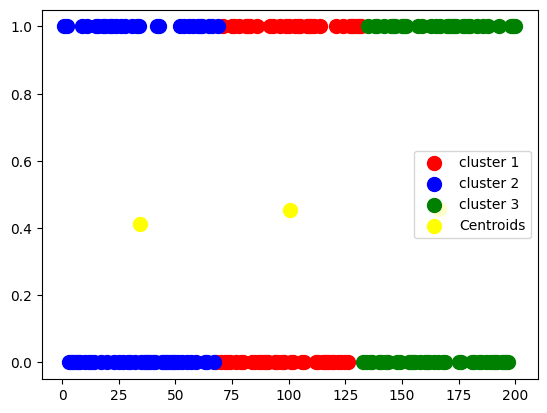

In [ ]:
#Visualsing the clusters
plt.scatter(x.iloc[y_kmeans == 0,0], x.iloc[y_kmeans==0,1], s=100,c='red',label= 'cluster 1')
plt.scatter(x.iloc[y_kmeans == 1,0], x.iloc[y_kmeans==1,1], s=100,c='blue',label= 'cluster 2')
plt.scatter(x.iloc[y_kmeans == 2,0], x.iloc[y_kmeans==2,1], s=100,c='green',label= 'cluster 3')
#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()




